In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# 1 General Characteristics of the data

In [39]:
bank_df = pd.read_csv("bank_data.csv", sep=',')
bank_df.head(1)

id  age  income  children  gender      region married car  \
0  ID12101   48   17546         1  FEMALE  INNER_CITY      NO  NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES

In [40]:
bank_df.describe()


age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000

In [41]:
print("Standard Deviations : \n", bank_df[["age", "income", "children"]].std())

Standard Deviations : 
 age            14.424947
income      12899.468246
children        1.056752
dtype: float64


In [42]:
bank_df.groupby("married").mean()

age        income  children
married                                   
NO       42.186275  27674.627108  1.083333
YES      42.502525  27446.451515  0.974747

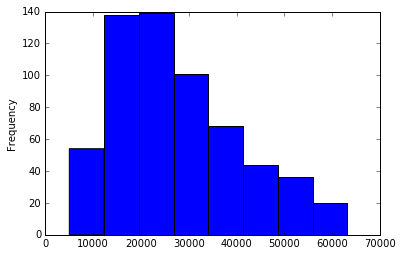

In [43]:
bank_df["income"].plot(kind="hist", bins=8)

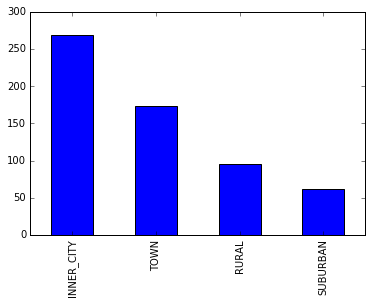

In [44]:
bank_df["region"].value_counts().plot(kind='bar')

In [45]:
#bank_df.groupby(["region","income"])["region"].value_counts()
#plt.show(bank_df.boxplot(column=["region"]))

In [46]:
bank_df.groupby("mortgage").describe()

age    children        income
mortgage                                            
NO       count  391.000000  391.000000    391.000000
         mean    42.565217    1.069054  27662.194680
         std     14.461805    1.073140  13199.249366
         min     18.000000    0.000000   7549.380000
         25%     30.000000    0.000000  17144.350000
         50%     43.000000    1.000000  25127.700000
         75%     54.500000    2.000000  36434.600000
         max     67.000000    3.000000  63130.100000
YES      count  209.000000  209.000000    209.000000
         mean    42.076555    0.904306  27265.553158
         std     14.384951    1.019252  12345.988391
         min     18.000000    0.000000   5014.210000
         25%     31.000000    0.000000  17866.900000
         50%     41.000000    1.000000  24763.300000
         75%     56.000000    2.000000  34852.300000
         max     67.000000    3.000000  60747.500000

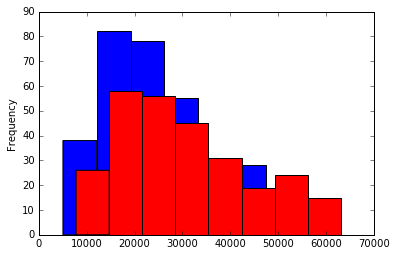

In [47]:
#2 PEP comparison
#bank_df.groupby(["pep","income"])["pep"].count()
pep_y = bank_df[bank_df.pep=='YES']
pep_n = bank_df[bank_df.pep == 'NO']

pep_n["income"].plot(kind='hist', bins  = 8)
pep_y["income"].plot(kind='hist', bins = 8, color='red')
#pep_n["income"].plot(kind='hist', bins  = 8)
#bank_df[pep_y].count()


In [48]:
bank_df.groupby('pep').describe()

age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000

In [49]:
# 3 Zscore
zscore = lambda x: ((x - x.mean()) / x.std()) if (x.dtypes==np.float64 or x.dtypes==np.int64) else x
zbank = bank_df.copy()
zbank.apply(zscore).head()

id       age    income  children  gender      region married  car  \
0  ID12101  0.388563 -0.773523 -0.011040  FEMALE  INNER_CITY      NO   NO   
1  ID12102 -0.166032  0.198541  1.881551    MALE        TOWN     YES  YES   
2  ID12103  0.596536 -0.848766 -0.957336  FEMALE  INNER_CITY     YES  YES   
3  ID12104 -1.344546 -0.554180  1.881551  FEMALE        TOWN     YES   NO   
4  ID12105  1.012482  1.787071 -0.957336  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

In [51]:
#4 descritize
bank_descritiz = pd.qcut(bank_df.age, [0, .33, .66, 1], labels=["young", "middle-aged", "over-the-hill"], retbins=True)
bank_descritiz



(0        middle-aged
 1        middle-aged
 2      over-the-hill
 3              young
 4      over-the-hill
 5      over-the-hill
 6              young
 7      over-the-hill
 8        middle-aged
 9      over-the-hill
 10     over-the-hill
 11     over-the-hill
 12       middle-aged
 13     over-the-hill
 14       middle-aged
 15       middle-aged
 16       middle-aged
 17       middle-aged
 18     over-the-hill
 19             young
 20     over-the-hill
 21     over-the-hill
 22     over-the-hill
 23             young
 24             young
 25     over-the-hill
 26       middle-aged
 27       middle-aged
 28       middle-aged
 29     over-the-hill
            ...      
 570      middle-aged
 571      middle-aged
 572            young
 573      middle-aged
 574      middle-aged
 575      middle-aged
 576            young
 577    over-the-hill
 578            young
 579      middle-aged
 580    over-the-hill
 581            young
 582      middle-aged
 583      middle-aged
 584      

In [67]:
#5 mix_max Normalization
normalize = lambda x: ((x - x.min()) / (x.max() - x.min()))
bank_num = bank_df[["age","income","children"]]
bank_df2 =bank_num.apply(normalize)
bank_df2.head(4)

age    income  children
0  0.612245  0.215634  0.333333
1  0.448980  0.431395  1.000000
2  0.673469  0.198933  0.000000
3  0.102041  0.264320  1.000000

In [72]:
# 6 stanard spreadsheet
regi = pd.get_dummies(bank_df['region'], prefix="Region")
car = pd.get_dummies(bank_df['car'], prefix = "car")
savings = pd.get_dummies(bank_df['savings_acct'], prefix ="savings")
current = pd.get_dummies(bank_df['current_acct'], prefix ="current")
mortgage = pd.get_dummies(bank_df['mortgage'], prefix="mortgage")
pep = pd.get_dummies(bank_df['pep'], prefix="pep")
bank_new = pd.concat([bank_df2, regi, car, savings, current, mortgage, pep], axis = 1)
# concatinate each df of 01 into the main
bank_new.head(4)
#newname = pd.get_dummies(bank_df)
bank_new.to_csv("bank_numeric.csv",float_format="%1.2f")

In [73]:
# 7 correleation
bank_new.corr()
# age and income are highly positively correlated.  Both age and pep have a small correlation, ~.2 for each, with age. 
# Nothing else really appears to have a very strong correlation.
#(obviously any categorical attibute that has been turned into 2 numeric attibutes,
# will be hightly negetively correlated with its opposite, a correlation of -1.)

age    income  children  Region_INNER_CITY  \
age                1.000000  0.752726  0.023572          -0.025171   
income             0.752726  1.000000  0.036761          -0.047564   
children           0.023572  0.036761  1.000000          -0.051222   
Region_INNER_CITY -0.025171 -0.047564 -0.051222           1.000000   
Region_RURAL       0.018635  0.084776  0.089902          -0.393444   
Region_SUBURBAN    0.031345  0.029824 -0.014122          -0.306032   
Region_TOWN       -0.008510 -0.036431 -0.007033          -0.573814   
car_NO            -0.077733 -0.081556 -0.036455           0.018143   
car_YES            0.077733  0.081556  0.036455          -0.018143   
savings_NO        -0.184389 -0.266164 -0.041536           0.091373   
savings_YES        0.184389  0.266164  0.041536          -0.091373   
current_NO         0.035312 -0.031616 -0.006238          -0.007894   
current_YES       -0.035312  0.031616  0.006238           0.007894   
mortgage_NO        0.016154  0.014662  0.074339          -0.002098   
mortgage_YES      -0.016154 -0.014662 -0.074339           0.002098   
pep_NO            -0.173825 -0.221991  0.057663          -0.001054   
pep_YES            0.173825  0.221991 -0.057663           0.001054   

                   Region_RURAL  Region_SUBURBAN  Region_TOWN    car_NO  \
age                    0.018635         0.031345    -0.008510 -0.077733   
income                 0.084776         0.029824    -0.036431 -0.081556   
children               0.089902        -0.014122    -0.007033 -0.036455   
Region_INNER_CITY     -0.393444        -0.306032    -0.573814  0.018143   
Region_RURAL           1.000000        -0.148158    -0.277798 -0.024006   
Region_SUBURBAN       -0.148158         1.000000    -0.216080  0.061184   
Region_TOWN           -0.277798        -0.216080     1.000000 -0.041604   
car_NO                -0.024006         0.061184    -0.041604  1.000000   
car_YES                0.024006        -0.061184     0.041604 -1.000000   
savings_NO            -0.036960        -0.002605    -0.068654  0.034310   
savings_YES            0.036960         0.002605     0.068654 -0.034310   
current_NO             0.008496        -0.038157     0.027431 -0.034783   
current_YES           -0.008496         0.038157    -0.027431  0.034783   
mortgage_NO            0.051908        -0.004635    -0.036591 -0.007743   
mortgage_YES          -0.051908         0.004635     0.036591  0.007743   
pep_NO                -0.019714        -0.062508     0.059115  0.018917   
pep_YES                0.019714         0.062508    -0.059115 -0.018917   

                    car_YES  savings_NO  savings_YES  current_NO  current_YES  \
age                0.077733   -0.184389     0.184389    0.035312    -0.035312   
income             0.081556   -0.266164     0.266164   -0.031616     0.031616   
children           0.036455   -0.041536     0.041536   -0.006238     0.006238   
Region_INNER_CITY -0.018143    0.091373    -0.091373   -0.007894     0.007894   
Region_RURAL       0.024006   -0.036960     0.036960    0.008496    -0.008496   
Region_SUBURBAN   -0.061184   -0.002605     0.002605   -0.038157     0.038157   
Region_TOWN        0.041604   -0.068654     0.068654    0.027431    -0.027431   
car_NO            -1.000000    0.034310    -0.034310   -0.034783     0.034783   
car_YES            1.000000   -0.034310     0.034310    0.034783    -0.034783   
savings_NO        -0.034310    1.000000    -1.000000    0.042511    -0.042511   
savings_YES        0.034310   -1.000000     1.000000   -0.042511     0.042511   
current_NO         0.034783    0.042511    -0.042511    1.000000    -1.000000   
current_YES       -0.034783   -0.042511     0.042511   -1.000000     1.000000   
mortgage_NO        0.007743   -0.001588     0.001588   -0.036704     0.036704   
mortgage_YES      -0.007743    0.001588    -0.001588    0.036704    -0.036704   
pep_NO            -0.018917   -0.072779     0.072779    0.025141    -0.025141   
pep_YES            0.018917    0.07

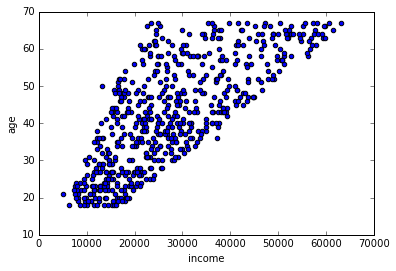

In [15]:
# 8 scatter plot income v. age
bank_df.plot(x="income", y="age", kind="scatter")
# Age and income appear to be correlated.  As age increases so does income.

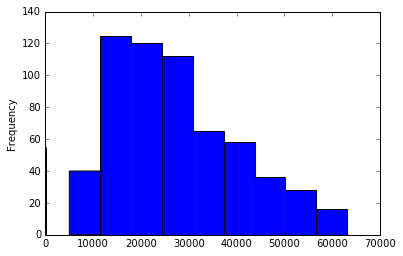

In [17]:
#9 historgram income 9 bin, age 15 bin
bank_df["income"].plot(kind="hist", bins=9)


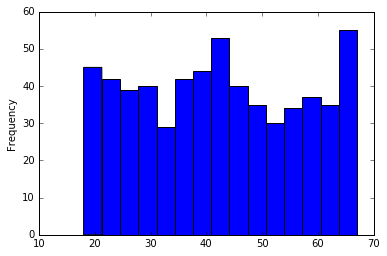

In [18]:
bank_df["age"].plot(kind="hist", bins=15)

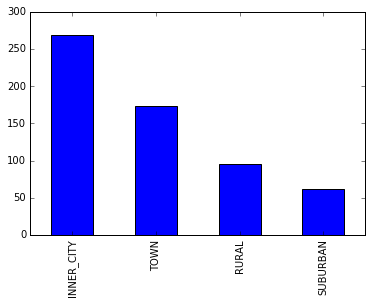

In [75]:
#10 t the distribution of the values of the region attribute.
bank_df["region"].value_counts().plot(kind="bar")

In [21]:
#11
xtab = pd.crosstab(bank_df["region"], bank_df["pep"])
xtab

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71

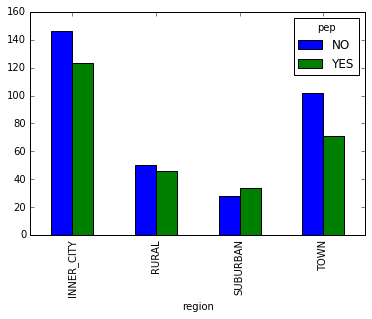

In [22]:
plt.show(xtab.plot(kind="bar"))